In [6]:
import tensorflow as tf
from tensorflow.python.client import device_lib
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1387700250703128469,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6264651776
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14667191438636596900
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [8]:
tf.test.is_built_with_cuda()

True

# Facial Emotion Recognition

- CNN model (custom)
- Kaggle dataset from Research Prediction Competition (https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data)

The program has been tested to work with the following modules and their versions.
- keras: 2.4.0
- tensorflow-gpu: 2.5.0
- pandas: 1.2.4
- numpy: 1.19.5
- sklearn: 0.24.2
- opendatasets: 0.1.13

In [9]:
pip show keras

Name: Keras
Version: 2.4.0
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: c:\users\ruhiy\.conda\envs\fer_cnn\lib\site-packages
Requires: h5py, tensorflow, scipy, pyyaml, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 2.5.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\ruhiy\.conda\envs\fer_cnn\lib\site-packages
Requires: grpcio, termcolor, tensorboard, protobuf, google-pasta, keras-nightly, typing-extensions, keras-preprocessing, wheel, gast, wrapt, h5py, tensorflow-estimator, opt-einsum, astunparse, absl-py, six, flatbuffers, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip show pandas

Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\ruhiy\.conda\envs\fer_cnn\lib\site-packages
Requires: python-dateutil, pytz, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip show numpy

Name: numpy
Version: 1.19.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: c:\users\ruhiy\.conda\envs\fer_cnn\lib\site-packages
Requires: 
Required-by: tensorflow, tensorflow-gpu, tensorboard, scipy, scikit-learn, pandas, opt-einsum, matplotlib, Keras, Keras-Preprocessing, Keras-Applications, h5py
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip show sklearn

Name: sklearn
Version: 0.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://pypi.python.org/pypi/scikit-learn/
Author: UNKNOWN
Author-email: UNKNOWN
License: None
Location: c:\users\ruhiy\.conda\envs\fer_cnn\lib\site-packages
Requires: scikit-learn
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip show opendatasets

Name: opendatasets
Version: 0.1.13
Summary: A curated collection of datasets for data analysis & machine learning, downloadable with a single Python command
Home-page: https://github.com/JovianML/opendatasets
Author: Jovian.ml
Author-email: hello@jovian.ml
License: UNKNOWN
Location: c:\users\ruhiy\.conda\envs\fer_cnn\lib\site-packages
Requires: kaggle, tqdm, click
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import opendatasets as od
import tensorflow as tf
import os
import warnings
warnings.filterwarnings("ignore")

In [16]:
os.path.isdir(r'C:\Users\ruhiy\Documents\Machine Learning\Facial Recognition\fer-main\challenges-in-representation-learning-facial-expression-recognition-challenge')

True

In [17]:
BASE_DIR = r'C:\Users\ruhiy\Documents\Machine Learning\Facial Recognition\fer-main'
DATA_DIR = r'C:\Users\ruhiy\Documents\Machine Learning\Facial Recognition\fer-main\challenges-in-representation-learning-facial-expression-recognition-challenge'

In [18]:
if not(os.path.isdir(DATA_DIR)):
    od.download('https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data')

In [19]:
import zipfile

if not(os.path.isdir(DATA_DIR)):
    path_to_zip_file = r'C:\Users\ruhiy\Documents\Machine Learning\Facial Recognition\fer-main\challenges-in-representation-learning-facial-expression-recognition-challenge\challenges-in-representation-learning-facial-expression-recognition-challenge.zip'
    directory_to_extract_to = r'C:\Users\ruhiy\Documents\Machine Learning\Facial Recognition\fer-main\challenges-in-representation-learning-facial-expression-recognition-challenge'
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall(directory_to_extract_to)

In [20]:
# extract fer2013.tar.gz file
if not(os.path.isdir(os.path.join(DATA_DIR, 'fer2013'))):
    !tar -xzvf "C:\Users\ruhiy\Documents\Machine Learning\Facial Recognition\fer-main\challenges-in-representation-learning-facial-expression-recognition-challenge\fer2013.tar.gz" -C "C:\Users\ruhiy\Documents\Machine Learning\Facial Recognition\fer-main\challenges-in-representation-learning-facial-expression-recognition-challenge" 

In [21]:
data = pd.read_csv(os.path.join(DATA_DIR, 'fer2013', 'fer2013.csv'))

In [22]:
print(data)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [23]:
width, height = 48, 48

datapoints = data['pixels'].tolist()

In [24]:
# getting features for training
X = []
for xseq in datapoints:
    xx = [int(xp) for xp in xseq.split(' ')]
    xx = np.asarray(xx).reshape(width, height)
    X.append(xx.astype('float32'))

In [25]:
X = np.asarray(X)
X = np.expand_dims(X, -1)

In [26]:
# getting labels for training
y = pd.get_dummies(data['emotion']).to_numpy()

In [27]:
# storing them using numpy
np.save('fdataX', X)
np.save('flabels', y)

In [28]:
print("Preprocessing Done")
print("Number of Features: "+str(len(X[0])))
print("Number of Labels: "+ str(len(y[0])))
print("Number of examples in dataset:"+str(len(X)))
print("X,y stored in fdataX.npy and flabels.npy respectively")

Preprocessing Done
Number of Features: 48
Number of Labels: 7
Number of examples in dataset:35887
X,y stored in fdataX.npy and flabels.npy respectively


In [29]:
import sys, os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [30]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 100
width, height = 48, 48

In [31]:
x = np.load('./fdataX.npy')
y = np.load('./flabels.npy')

In [32]:
x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)

In [33]:
# splitting into training, validation and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=41)

In [34]:
# 29068 images are used for training
y_train.shape

(29068, 7)

In [35]:
# 3589 images are used for testing
y_test.shape

(3589, 7)

In [36]:
# saving the test samples to be used later
np.save('modXtest', X_test)
np.save('modytest', y_test)

In [37]:
# desinging the CNN
model = keras.Sequential()

In [38]:
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

In [39]:
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

In [40]:
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

In [41]:
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

In [42]:
model.add(Flatten())

In [43]:
model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

In [44]:
model.add(Dense(num_labels, activation='softmax'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

In [46]:
# Compliling the model with adam optimizer and categorical crossentropy loss
opt = Adam(
    learning_rate = 0.001,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-7
)
print(opt)

In [47]:
model.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])

In [52]:
# training the model
if not(os.path.isfile(os.path.join(BASE_DIR, 'fer.h5'))):
    model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_valid), np.array(y_valid)),
          shuffle=True)

In [53]:
# saving the  model to be used later
if not(os.path.isfile(os.path.join(BASE_DIR, 'fer.h5'))):
    fer_json = model.to_json()
    with open("fer.json", "w") as json_file:
        json_file.write(fer_json)
    model.save_weights("fer.h5")
    print("Saved model to disk")

### Testing the model

In [54]:
# load json and create model
from __future__ import division
from tensorflow.keras.models import model_from_json

In [55]:
json_file = open('fer.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("fer.h5")
print("Loaded model from disk")

Loaded model from disk


In [56]:
truey=[]
predy=[]
x = np.load('./modXtest.npy')
y = np.load('./modytest.npy')

In [57]:
yhat= loaded_model.predict(x)
yh = yhat.tolist()
yt = y.tolist()
count = 0

In [58]:
for i in range(len(y)):
    yy = max(yh[i])
    yyt = max(yt[i])
    predy.append(yh[i].index(yy))
    truey.append(yt[i].index(yyt))
    if(yh[i].index(yy)== yt[i].index(yyt)):
        count+=1

acc = (count/len(y))*100

In [59]:
# saving values for confusion matrix and analysis
np.save('truey', truey)
np.save('predy', predy)
print("Predicted and true label values saved")
print("Accuracy on test set :"+str(acc)+"%")

Predicted and true label values saved
Accuracy on test set :66.00724435775982%


### Useful Resources
Adam optimzer: https://keras.io/api/optimizers/adam/
Research paper regarding fer: https://arxiv.org/pdf/1307.0414.pdf

## Confusion Matrix

In [60]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [61]:
y_true = np.load('./truey.npy')
y_pred = np.load('./predy.npy')
cm = confusion_matrix(y_true, y_pred)
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
title='Confusion matrix'
print(cm)

[[247   5  61  28  79  10  68]
 [  7  30   6   0   5   0   4]
 [ 32   4 265  27 108  43  66]
 [ 20   1  18 760  18  16  48]
 [ 43   0  58  24 356   4 103]
 [ 10   0  48  34  10 297  15]
 [ 26   1  31  53  78   8 414]]


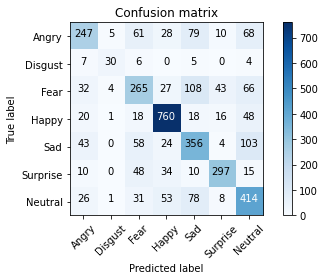

In [62]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max()/ 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

### Testing with Personal Input

In [64]:
# creates user_test folder
user_test_path = os.path.join(BASE_DIR, 'user_test')
if not(os.path.exists(os.path.join(BASE_DIR, 'user_test'))):
    os.mkdir(user_test_path)
    print('Directory created.')

Directory created.


In [78]:
print('Please upload your picture')
if os.path.isfile(os.path.join(user_test_path, 'pic.jpg')):
    print('You have succesfully uploaded a picture!')

Please upload your picture
You have succesfully uploaded a picture!


In [84]:
# load json and create model
from __future__ import division
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json
import numpy
import os
import numpy as np
import cv2

In [86]:
# loading the model
json_file = open('fer.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("fer.h5")
print("Loaded model from disk")

Loaded model from disk


In [87]:
# setting image resizing parameters
WIDTH = 48
HEIGHT = 48
x=None
y=None
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [96]:
# loading image
full_size_image = cv2.imread("user_test/test.jpg")
print("Image Loaded")
gray=cv2.cvtColor(full_size_image,cv2.COLOR_RGB2GRAY)
face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face.detectMultiScale(gray, 1.3  , 10)

Image Loaded


In [ ]:
# detecting faces
for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        cv2.rectangle(full_size_image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        # predicting the emotion
        yhat= loaded_model.predict(cropped_img)
        cv2.putText(full_size_image, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
        print("Emotion: "+labels[int(np.argmax(yhat))])

cv2.imshow('Emotion', full_size_image)
cv2.waitKey()